In [34]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pathlib import Path
from typing import List
from datagov_api import fetch_fuel_price
from utils import standardise_col_names, standardise_str_values, display_unique_object_values

<h2>Data Fetching</h2>

In [2]:
FORCE_UPDATE = False
fuelprice_data_path: Path = Path.cwd() / "data" / "fuel_price_data.json"

In [3]:
if not os.path.exists(fuelprice_data_path) or os.path.getsize(fuelprice_data_path) == 0 or FORCE_UPDATE:
    data = fetch_fuel_price(limit=None)

    with open(fuelprice_data_path, "w") as f:
        json.dump(data, f, ensure_ascii=True, indent=4)

    fuelprice_df = pd.DataFrame(data)

else:
    fuelprice_df = pd.read_json("./data/fuel_price_data.json")

Fetch the data using api call for the first time and write it to fuel_price_data.json, while the FORCE_UPDATE is not True, the data used for the analysis would be read from the local file

<h2>EDA</h2>

In [6]:
fuelprice_df.head()

,date,ron95,ron97,diesel,series_type,diesel_eastmsia
0,2021-12-23,2.05,2.99,2.15,level,2.15
1,2021-12-16,2.05,3.00,2.15,level,2.15
2,2021-12-09,2.05,2.99,2.15,level,2.15
3,2021-12-02,2.05,3.02,2.15,level,2.15
4,2021-11-25,2.05,3.05,2.15,level,2.15


In [7]:
fuelprice_df.tail()

,date,ron95,ron97,diesel,series_type,diesel_eastmsia
822,2017-05-04,-0.10,-0.10,-0.06,change_weekly,-0.06
823,2017-04-27,-0.06,-0.05,-0.07,change_weekly,-0.07
824,2017-04-20,0.03,0.02,0.05,change_weekly,0.05
825,2017-04-13,0.08,0.09,0.08,change_weekly,0.08
826,2017-04-06,0.03,0.02,-0.03,change_weekly,-0.03


In [8]:
fuelprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             827 non-null    datetime64[ns]
 1   ron95            827 non-null    float64       
 2   ron97            827 non-null    float64       
 3   diesel           827 non-null    float64       
 4   series_type      827 non-null    object        
 5   diesel_eastmsia  827 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 38.9+ KB


In [9]:
fuelprice_df['date'] = pd.to_datetime(fuelprice_df['date'])

Transforming the string type date data to datetime object

In [10]:
fuelprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             827 non-null    datetime64[ns]
 1   ron95            827 non-null    float64       
 2   ron97            827 non-null    float64       
 3   diesel           827 non-null    float64       
 4   series_type      827 non-null    object        
 5   diesel_eastmsia  827 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 38.9+ KB


In [11]:
fuelprice_df = standardise_col_names(fuelprice_df)
fuelprice_df = standardise_str_values(fuelprice_df)
fuelprice_df.head()

,date,ron95,ron97,diesel,series_type,diesel_eastmsia
0,2021-12-23,2.05,2.99,2.15,LEVEL,2.15
1,2021-12-16,2.05,3.00,2.15,LEVEL,2.15
2,2021-12-09,2.05,2.99,2.15,LEVEL,2.15
3,2021-12-02,2.05,3.02,2.15,LEVEL,2.15
4,2021-11-25,2.05,3.05,2.15,LEVEL,2.15


Standardizing the column name and string data

In [12]:
fuelprice_df.describe()

,date,ron95,ron97,diesel,diesel_eastmsia
count,827,827.000000,827.000000,827.000000,827.000000
mean,2021-06-22 05:04:42.950423040,1.013712,1.460423,1.115079,1.054148
min,2017-03-30 00:00:00,-0.380000,-0.360000,-0.170000,-0.170000
25%,2019-07-23 12:00:00,0.000000,0.000000,0.000000,0.000000
50%,2021-07-15 00:00:00,1.250000,1.550000,1.400000,1.400000
75%,2023-07-06 00:00:00,2.050000,2.740000,2.150000,2.150000
max,2025-06-19 00:00:00,2.380000,4.840000,3.350000,2.340000
std,NaN,1.021026,1.531439,1.142810,1.058745


In [13]:
display_unique_object_values(fuelprice_df)


Column: series_type
Unique values (2):
['LEVEL' 'CHANGE_WEEKLY']


There're two different data series in the dataset

In [14]:
weekly_fuelprice_changes = fuelprice_df[fuelprice_df['series_type'] == 'CHANGE_WEEKLY'].sort_values(by='date', ascending=True).reset_index()
weekly_fuelprice = fuelprice_df[fuelprice_df['series_type'] == 'LEVEL'].sort_values(by='date', ascending=True).reset_index()

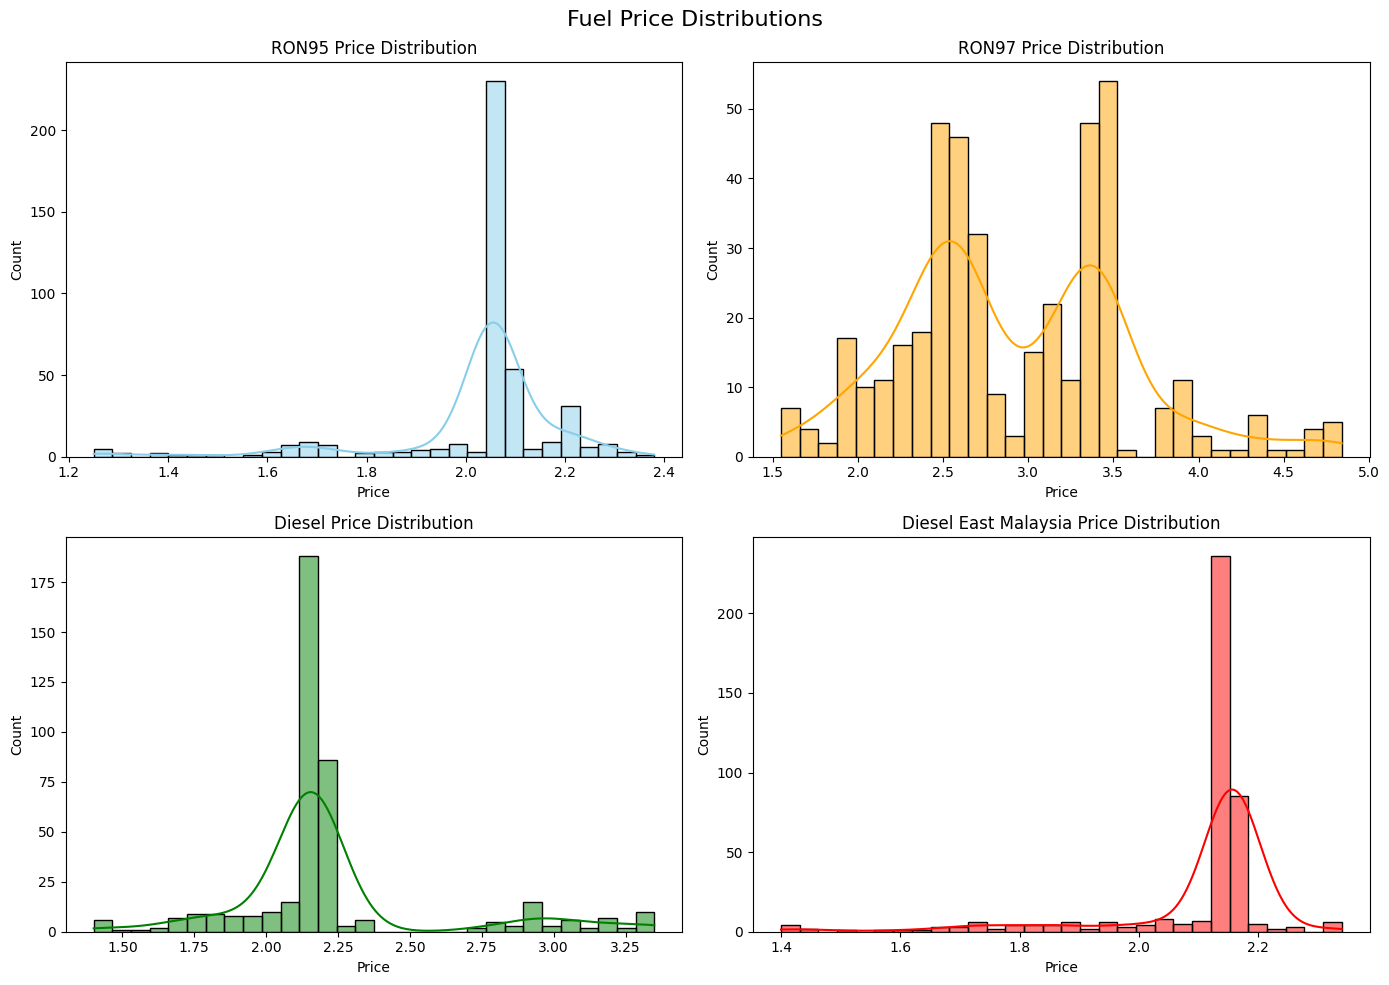

In [15]:
# Set up a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Fuel Price Distributions", fontsize=16)

# Plot for ron95
sns.histplot(data=weekly_fuelprice, x='ron95', kde=True, bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('RON95 Price Distribution')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Count')

# Plot for ron97
sns.histplot(data=weekly_fuelprice, x='ron97', kde=True, bins=30, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('RON97 Price Distribution')
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Count')

# Plot for diesel
sns.histplot(data=weekly_fuelprice, x='diesel', kde=True, bins=30, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Diesel Price Distribution')
axes[1, 0].set_xlabel('Price')
axes[1, 0].set_ylabel('Count')

# Plot for diesel_eastmsia
sns.histplot(data=weekly_fuelprice, x='diesel_eastmsia', kde=True, bins=30, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Diesel East Malaysia Price Distribution')
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('Count')

plt.tight_layout() 
plt.show()


**RON95**

Strong central peak around RM2.05, indicating heavy price regulation.

Minimal variance, suggesting fixed or subsidized pricing.

**RON97**

Multi-modal distribution with visible peaks around RM2.5–3.5.

Higher variance compared to RON95, reflecting market-driven pricing.

**Diesel**

Dominant peak around RM2.15–2.20.

Some spread, but majority of values remain close to a fixed level — likely also regulated.

**Diesel (East Malaysia)**

Very tight clustering around RM2.15–2.20.

Almost identical distribution to standard diesel, likely same regulatory policy.

**Insight:**
RON97 shows a market-sensitive pricing pattern, while RON95 and both diesel types showing minimal fluctuation likely due to government control policy.

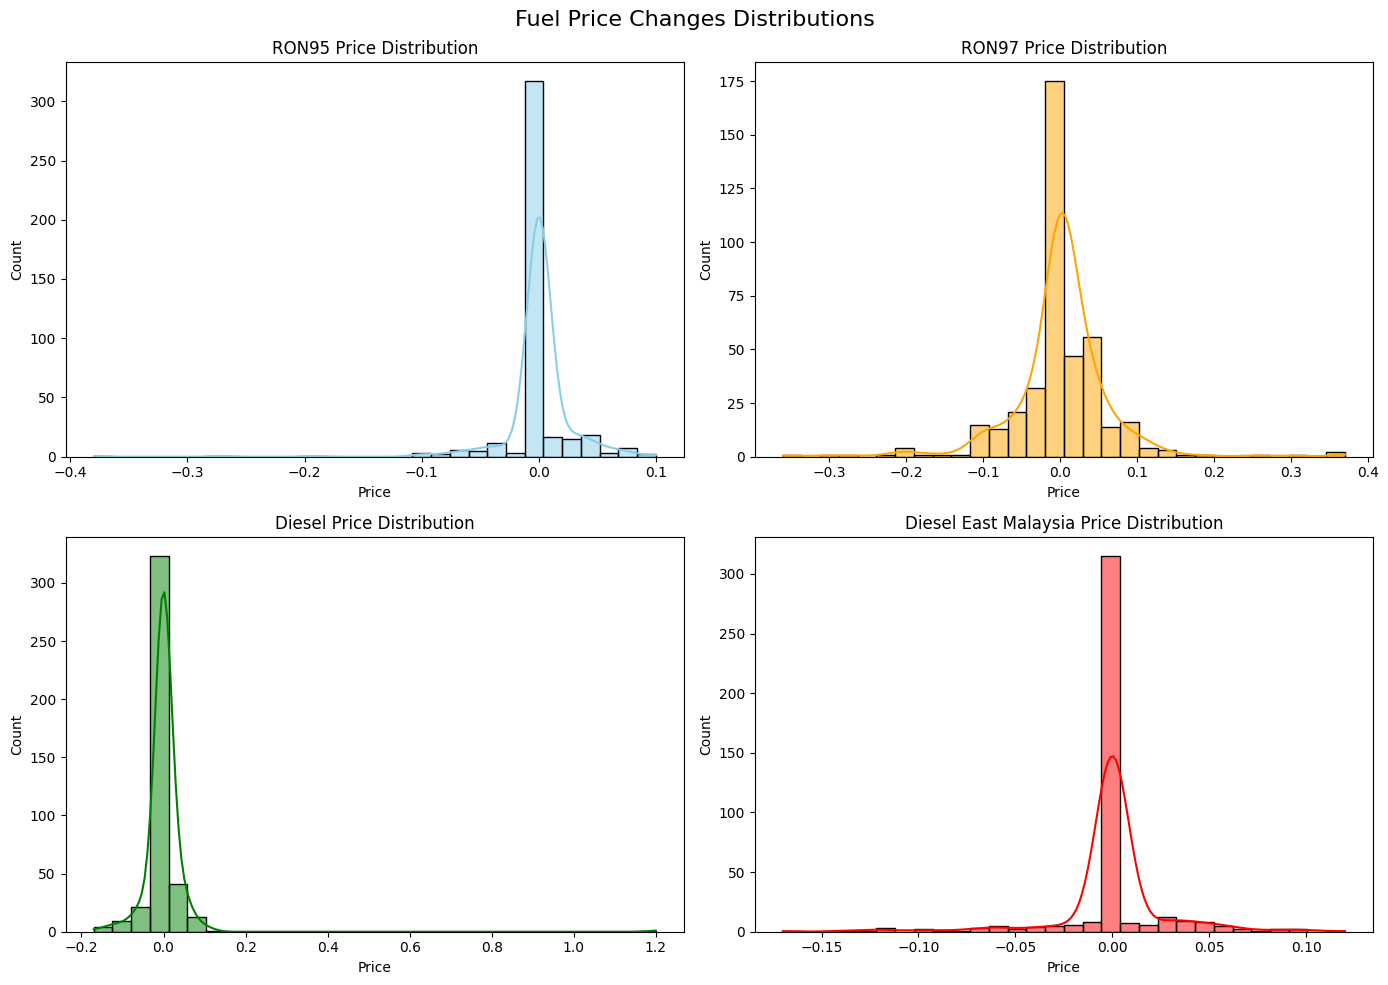

In [16]:
# Set up a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Fuel Price Changes Distributions", fontsize=16)

# Plot for ron95
sns.histplot(data=weekly_fuelprice_changes, x='ron95', kde=True, bins=30, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('RON95 Price Distribution')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Count')

# Plot for ron97
sns.histplot(data=weekly_fuelprice_changes, x='ron97', kde=True, bins=30, ax=axes[0, 1], color='orange')
axes[0, 1].set_title('RON97 Price Distribution')
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Count')

# Plot for diesel
sns.histplot(data=weekly_fuelprice_changes, x='diesel', kde=True, bins=30, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Diesel Price Distribution')
axes[1, 0].set_xlabel('Price')
axes[1, 0].set_ylabel('Count')

# Plot for diesel_eastmsia
sns.histplot(data=weekly_fuelprice_changes, x='diesel_eastmsia', kde=True, bins=30, ax=axes[1, 1], color='red')
axes[1, 1].set_title('Diesel East Malaysia Price Distribution')
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('Count')

plt.tight_layout() 
plt.show()


### **RON95**

Extremely sharp peak at 0, suggesting price remains constant most weeks.

Occasional small drops (~−0.05), rare increases — consistent with subsidy control.

### **RON97**

Much more spread out than RON95.

Slight skew to the left, with more frequent price drops than hikes.

Reflects responsiveness to market shifts.

### **Diesel**

Sharp peak at 0 with a few outliers.

A small number of large jumps (right tail), possibly policy shifts.

### **Diesel (East Malaysia)**

Very narrow distribution, symmetric around 0.

Suggests almost no weekly fluctuation — indicates firm price stability in that region.

### **Insight:**

RON97 is the only fuel type showing **regular** week-to-week movement, implying market exposure. All others are largely static due to regulatory controls.



<h2>Transformation</h2>

In [17]:
fuelprice_df['year'] = fuelprice_df['date'].dt.year
fuelprice_df['month'] = fuelprice_df['date'].dt.month
fuelprice_df['week_number'] = fuelprice_df['date'].dt.isocalendar().week

Added year and month columns to the data frame

In [18]:
fuelprice_df.head()

,date,ron95,ron97,diesel,series_type,diesel_eastmsia,year,month,week_number
0,2021-12-23,2.05,2.99,2.15,LEVEL,2.15,2021,12,51
1,2021-12-16,2.05,3.00,2.15,LEVEL,2.15,2021,12,50
2,2021-12-09,2.05,2.99,2.15,LEVEL,2.15,2021,12,49
3,2021-12-02,2.05,3.02,2.15,LEVEL,2.15,2021,12,48
4,2021-11-25,2.05,3.05,2.15,LEVEL,2.15,2021,11,47


Check if the columns added

In [19]:
def add_rolling_average(df: pd.DataFrame, target_col_names: List[str]):
    for col_name in target_col_names:
        col_4w = col_name + "_ra_4w"
        col_52w = col_name + "_ra_52w"

        df[col_4w] = df[col_name].rolling(window=4).mean()
        df[col_52w] = df[col_name].rolling(window=52).mean()

    return df

In [20]:
def add_rolling_std(df: pd.DataFrame, target_col_names: List[str], new_col_suffix: str, window_size: int = 12):
    for col_name in target_col_names:
        new_col_name = col_name + new_col_suffix
        df[new_col_name] = df[col_name].rolling(window=window_size).std()

    return df

In [21]:
weekly_fuelprice_changes = fuelprice_df[fuelprice_df['series_type'] == 'CHANGE_WEEKLY'].sort_values(by='date', ascending=True).reset_index()

In [22]:
weekly_fuelprice = fuelprice_df[fuelprice_df['series_type'] == 'LEVEL'].sort_values(by='date', ascending=True).reset_index()
weekly_fuelprice['ron95_ron97_price_gap'] = weekly_fuelprice['ron97'] - weekly_fuelprice['ron95']

Split the data set into **weekly_fuelprice_changes (series_type = CHANGE_WEEKLY)** and **weekly_fuelprice (series_type = 'LEVEL')** for further analysis

In [23]:
VOLATILITY_WINDOW_SIZE = 12

weekly_fuelprice_changes = add_rolling_average(weekly_fuelprice_changes, target_col_names=['ron95', 'ron97', 'diesel', 'diesel_eastmsia'])
weekly_fuelprice_changes = add_rolling_std(weekly_fuelprice_changes, 
                                           target_col_names=['ron95', 'ron97', 'diesel', 'diesel_eastmsia'], 
                                           new_col_suffix='_rs_12w', 
                                           window_size=VOLATILITY_WINDOW_SIZE)

weekly_fuelprice = add_rolling_average(weekly_fuelprice, target_col_names=['ron95', 'ron97', 'diesel', 'diesel_eastmsia'])
weekly_fuelprice = add_rolling_std(weekly_fuelprice, 
                                   target_col_names=['ron95', 'ron97', 'diesel', 'diesel_eastmsia'],
                                   new_col_suffix='rs_12w',
                                   window_size=VOLATILITY_WINDOW_SIZE)

Adding rolling average and rolling standard deviation for all the numerical columns for further analysis

<h2>Analysis</h2>

<h3>Price Trends Over Time</h3>


In [24]:
annual_fuelprice_df = weekly_fuelprice[['ron95', 
                                    'ron97', 
                                    'diesel', 
                                    'diesel_eastmsia', 
                                    'year']].groupby('year', as_index=False).mean()

In [25]:
annual_fuelprice_df

,year,ron95,ron97,diesel,diesel_eastmsia
0,2017,2.147250,2.424750,2.081250,2.081250
1,2018,2.216286,2.555714,2.202000,2.202000
2,2019,2.065577,2.550769,2.174615,2.174615
3,2020,1.671923,1.987308,1.800769,1.800769
4,2021,2.028491,2.650943,2.139623,2.139623
5,2022,2.050000,3.983654,2.150000,2.150000
6,2023,2.050000,3.383077,2.150000,2.150000
7,2024,2.050000,3.386038,2.697736,2.150000
8,2025,2.050000,3.263600,2.978000,2.150000


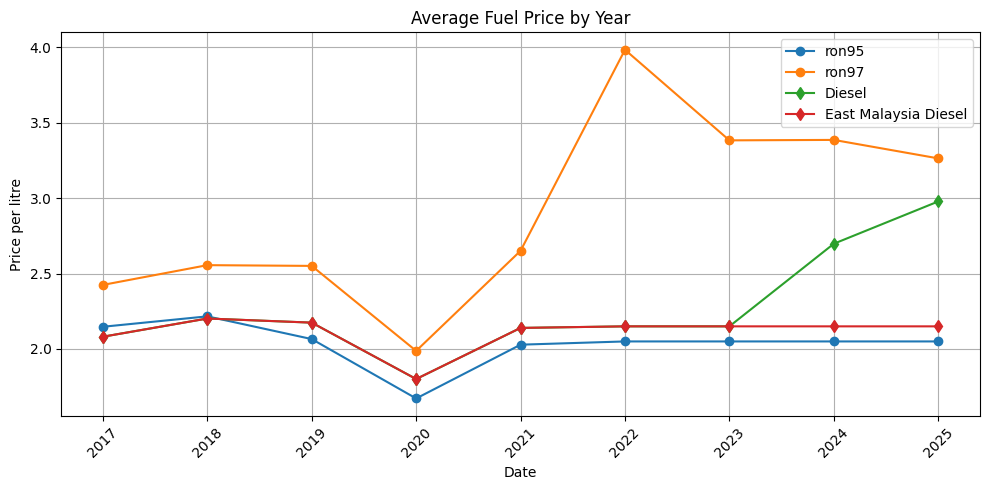

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(annual_fuelprice_df["year"], annual_fuelprice_df["ron95"], label="ron95", marker='o')
plt.plot(annual_fuelprice_df["year"], annual_fuelprice_df["ron97"], label="ron97", marker='o')
plt.plot(annual_fuelprice_df["year"], annual_fuelprice_df["diesel"], label="Diesel", marker='d')
plt.plot(annual_fuelprice_df["year"], annual_fuelprice_df["diesel_eastmsia"], label="East Malaysia Diesel", marker='d')

plt.xlabel("Date")
plt.ylabel("Price per litre")
plt.title("Average Fuel Price by Year")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

The line chart shows the trend of four types of fuel prices in Malaysia from **2017 to 2025**:

### Lines Represented:

* **ron95** (blue line): Shows a relatively **stable price**, around RM 2.05–2.20 per litre across all years, with a slight dip in 2020.
* **ron97** (orange line): Displays **high volatility**:

  * Peaked sharply in **2022** (close to RM 4.00).
  * Dropped to around RM 3.3–3.4 from **2023 onwards**.
  * Dropped significantly during **2020**, suggesting an impact from the global COVID-19 pandemic.
* **Diesel** (green line): Remained **flat until 2022**, then **increased sharply** in **2023** and continued rising until **2025**, indicating either subsidy removal or market price adjustment.
* **East Malaysia Diesel** (red line): Stable throughout the years, around RM 2.10–2.20, with a small dip in **2020**.

### Key Observations:

* **2020** shows a dip for all fuel types — likely due to **Covid-19** global lockdowns and reduced demand.
* **ron97** is consistently the most expensive fuel and the most volatile.
* **Diesel** shows a **major structural shift starting in 2023**, possibly reflecting a policy change affecting West Malaysia (not East).
* **ron95 and East Malaysia Diesel** are **price-controlled** or **subsidized**, explaining their stability.


<h3>Volatility over time</h3>

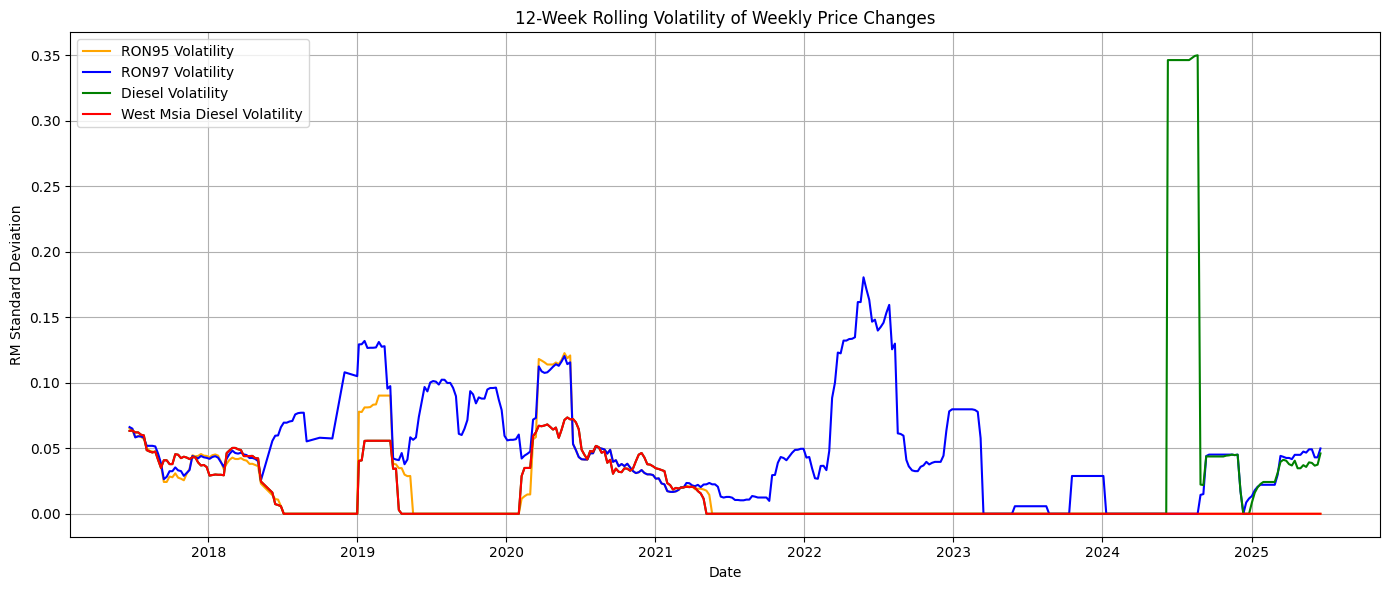

In [27]:
plt.figure(figsize=(14,6))
plt.plot(weekly_fuelprice_changes['date'], weekly_fuelprice_changes['ron95_rs_12w'], label='RON95 Volatility', color='orange')
plt.plot(weekly_fuelprice_changes['date'], weekly_fuelprice_changes['ron97_rs_12w'], label='RON97 Volatility', color='blue')
plt.plot(weekly_fuelprice_changes['date'], weekly_fuelprice_changes['diesel_rs_12w'], label='Diesel Volatility', color='green')
plt.plot(weekly_fuelprice_changes['date'], weekly_fuelprice_changes['diesel_eastmsia_rs_12w'], label='West Msia Diesel Volatility', color='red')


plt.title(f'{VOLATILITY_WINDOW_SIZE}-Week Rolling Volatility of Weekly Price Changes')
plt.xlabel('Date')
plt.ylabel('RM Standard Deviation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This line chart visualizes the **volatility (standard deviation)** of weekly price changes over time for four fuel types in Malaysia, using a **12-week rolling window**. Volatility is measured in **Malaysian Ringgit (RM)**, and higher values indicate greater instability or fluctuation in prices.

#### **RON97 (blue line)**:

* Shows **consistent and significant volatility**, especially around **2019**, **2020**, **2022**, and again during **2024–2025**.
* These spikes align with **global market events**, such as:

  * 2020: COVID-19 impact on global oil demand and supply.
  * 2022: Russia-Ukraine war and the resulting energy crisis.
* RON97 is **market-priced**, so it reacts directly to global oil price movements.

#### **RON95 (orange line)**:

* Exhibits **minor volatility** around **2018 to 2020**, but remains **almost flat from 2021 onwards**.
* This suggests **strong government price controls** or subsidies on RON95, shielding it from external shocks.

#### **Diesel (green line)**:

* Shows **no volatility** until a **sudden and large spike in early 2024**, reaching above **0.35 RM**, then moderate fluctuations into 2025.
* This indicates a **major structural change**, likely a **policy shift** such as **removal of subsidies or price deregulation**.

#### **West Malaysia Diesel (red line)**:

* Demonstrates **low and stable volatility** throughout the period, with values near zero after 2020.
* Suggests that **diesel pricing in West Malaysia remained regulated**, unlike general diesel pricing from 2024 onward.


<h3>Ron95 vs Ron97</h2>

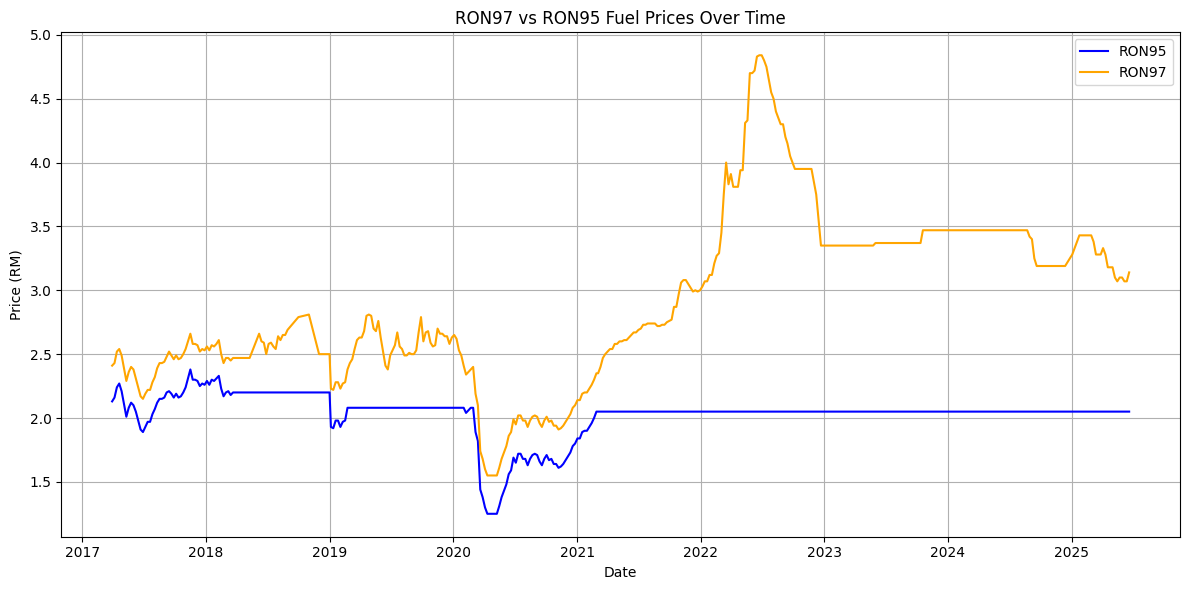

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_fuelprice['date'], weekly_fuelprice['ron95'], label='RON95', color='blue')
plt.plot(weekly_fuelprice['date'], weekly_fuelprice['ron97'], label='RON97', color='orange')
plt.title('RON97 vs RON95 Fuel Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (RM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [29]:
correlation = weekly_fuelprice[['ron95', 'ron97']].corr().iloc[0, 1]
print(f"Correlation: {correlation:.2f}")


Correlation: 0.40


This line chart compares **RON95 and RON97 fuel prices over time** from 2017 to 2025:

#### **RON95 (blue line)**:

* Remains relatively **flat and stable** across the years, typically around **RM 2.05** after 2020.
* The drop and recovery in **2020** are noticeable but less volatile compared to RON97.
* This reflects its **price-controlled status**—subsidized and shielded from global market forces.

#### **RON97 (orange line)**:

* Shows **significant fluctuations**, including:

  * A sharp drop in 2020 (pandemic-related).
  * A rapid surge from mid-2021 to a peak of nearly **RM 4.90** in mid-2022 (likely due to the **Russia-Ukraine war** and global oil supply disruptions).
  * Gradual decline into 2023–2025, but still remains well above RON95.

### **Correlation Note**:

* The **correlation coefficient is 0.40**, indicating a **weak to moderate positive relationship**.
* This suggests that while there is some shared movement—particularly during shocks like the pandemic—RON97 often **moves independently**, tracking **global oil prices**, whereas RON95 is **stabilized by policy**.

### Key Observations:

RON97 behaves like a commodity asset, reacting to international supply-demand dynamics. In contrast, RON95 follows a policy-driven path, demonstrating **price insulation** from external shocks.


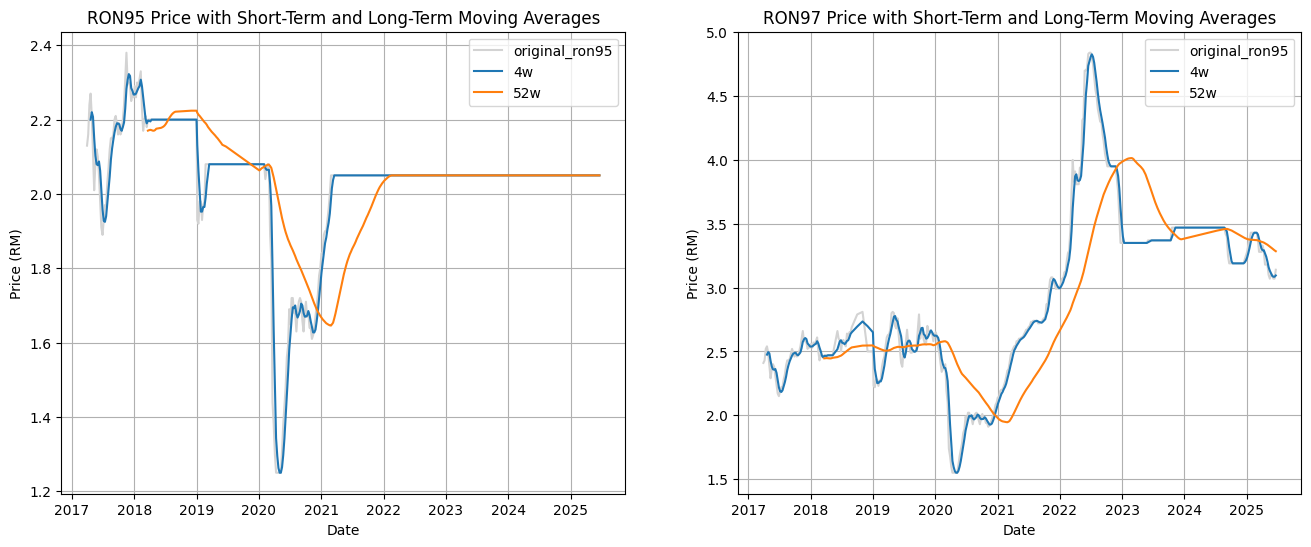

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=False)

ax[0].plot(weekly_fuelprice['date'], weekly_fuelprice['ron95'], label='original_ron95', color='lightgray')
ax[0].plot(weekly_fuelprice['date'], weekly_fuelprice['ron95_ra_4w'], label='4w')
ax[0].plot(weekly_fuelprice['date'], weekly_fuelprice['ron95_ra_52w'], label='52w')
ax[0].legend(loc='center left', bbox_to_anchor=(0, 0.5))

ax[0].xaxis.set_major_locator(mdates.YearLocator())         # one major tick per year
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # format as "2023", "2024", etc.

ax[0].set_title('RON95 Price with Short-Term and Long-Term Moving Averages')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price (RM)')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(weekly_fuelprice['date'], weekly_fuelprice['ron97'], label='original_ron95', color='lightgray')
ax[1].plot(weekly_fuelprice['date'], weekly_fuelprice['ron97_ra_4w'], label='4w')
ax[1].plot(weekly_fuelprice['date'], weekly_fuelprice['ron97_ra_52w'], label='52w')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax[1].xaxis.set_major_locator(mdates.YearLocator())         # one major tick per year
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # format as "2023", "2024", etc.

ax[1].set_title('RON97 Price with Short-Term and Long-Term Moving Averages')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price (RM)')
ax[1].legend()
ax[1].grid(True)

This side-by-side line plots showing **RON95** and **RON97** fuel prices over time, along with their **short-term (4-week)** and **long-term (52-week)** moving averages

### **Left Plot: RON95 Price with Moving Averages**

* **Raw price** (light gray): Volatile in earlier years, then stabilizes.
* **4-week MA (blue)**: Tracks short-term fluctuations closely, showing temporary dips and recoveries.
* **52-week MA (orange)**: Much smoother, capturing the long-term trend.

* A significant drop in 2020 during the COVID-19 period.
* Prices return to **RM 2.05** in 2021 and **flatten completely** after that, indicating a **government-imposed price cap**.
* Both moving averages converge after 2021, reflecting **no meaningful price movement** since then.

### **Right Plot: RON97 Price with Moving Averages**

* **Raw price** (light gray): Much more dynamic and responsive to market changes.
* **4-week MA (blue)**: Follows price spikes and corrections sharply.
* **52-week MA (orange)**: Smoothes out price surges, but still captures major upward trend.

* Prices drop sharply in 2020 and then surge from **mid-2021 to 2022**, peaking at nearly **RM 5.00**.
* Long-term average lags behind during periods of rapid price increases, which is expected behavior.
* From **2023 onward**, the trend is downward, and moving averages begin to converge again.


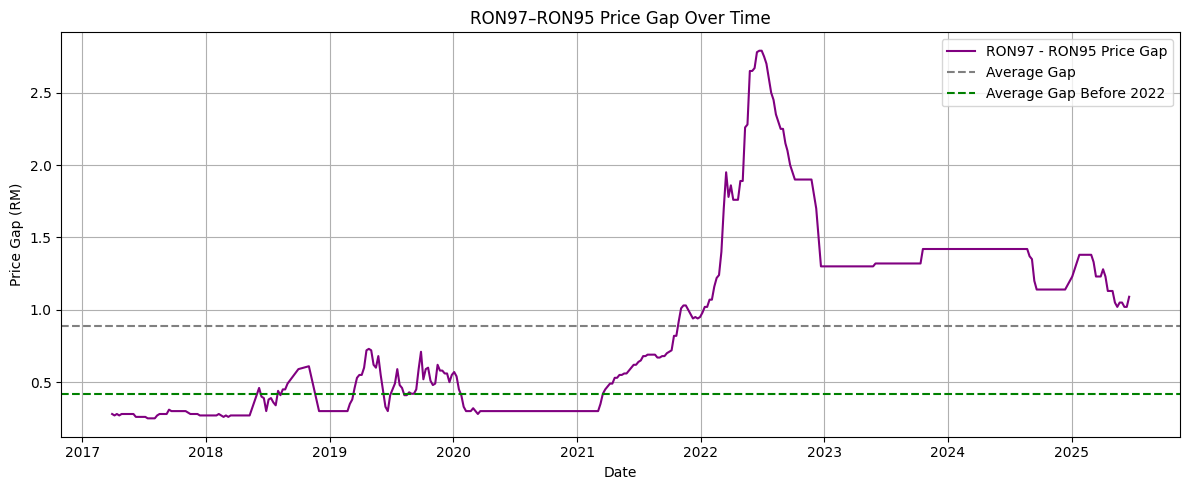

In [31]:
plt.figure(figsize=(12, 5))
plt.plot(weekly_fuelprice['date'], weekly_fuelprice['ron95_ron97_price_gap'], color='purple', label='RON97 - RON95 Price Gap')
plt.axhline(weekly_fuelprice['ron95_ron97_price_gap'].mean(), color='gray', linestyle='--', label='Average Gap')
plt.axhline(weekly_fuelprice[weekly_fuelprice['year'] < 2022]['ron95_ron97_price_gap'].mean(), color='green', linestyle='--', label='Average Gap Before 2022')
plt.title('RON97–RON95 Price Gap Over Time')
plt.xlabel('Date')
plt.ylabel('Price Gap (RM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This chart visualizes the **RON97 – RON95 fuel price gap over time**, highlighting how the price difference evolved from 2017 to 2025:

#### **Purple line – Price Gap (RON97 minus RON95):**

* Represents the **absolute difference in price per litre** between RON97 and RON95.
* This gap remained relatively small and stable **prior to 2022** (mostly under RM 0.50).
* Starting **early 2022**, the gap widened sharply, peaking at **over RM 2.7**, before gradually declining from 2023 onward.

#### **Gray dashed line – Average Gap (Overall):**

* Reflects the **mean price gap across the entire timeline (2017–2025)**.
* Slightly below RM 1.0, indicating how the surge from 2022 onwards pulled the average up significantly.

#### **Green dashed line – Average Gap Before 2022:**

* Reflects the **mean gap before the Russia-Ukraine war began**.
* Approximately RM 0.40, consistent with the earlier observation that RON97 prices were only moderately higher than RON95 when both were more stable.

### Key Observations:

* The **sharp increase in the price gap from 2022** is a direct result of **RON97 following global market prices**, which surged due to the **Russia-Ukraine war** and oil market disruptions.
* **RON95 remained fixed** at RM 2.05 due to government subsidies, exaggerating the price gap even further.
* From late 2023 onwards, the gap **shrinks again**, either due to **falling RON97 prices** or **partial policy adjustments**.
* The **shift in average price gap** (gray vs green line) demonstrates how significant the post-2022 events were in altering market dynamics.


<h3>Do fuel prices follow seasonal trends?</h3>

In [32]:
monthly_avg = (
    weekly_fuelprice
    .groupby(by='month')[['ron95', 'ron97', 'diesel', 'diesel_eastmsia']]
    .mean()
    .reset_index()
)


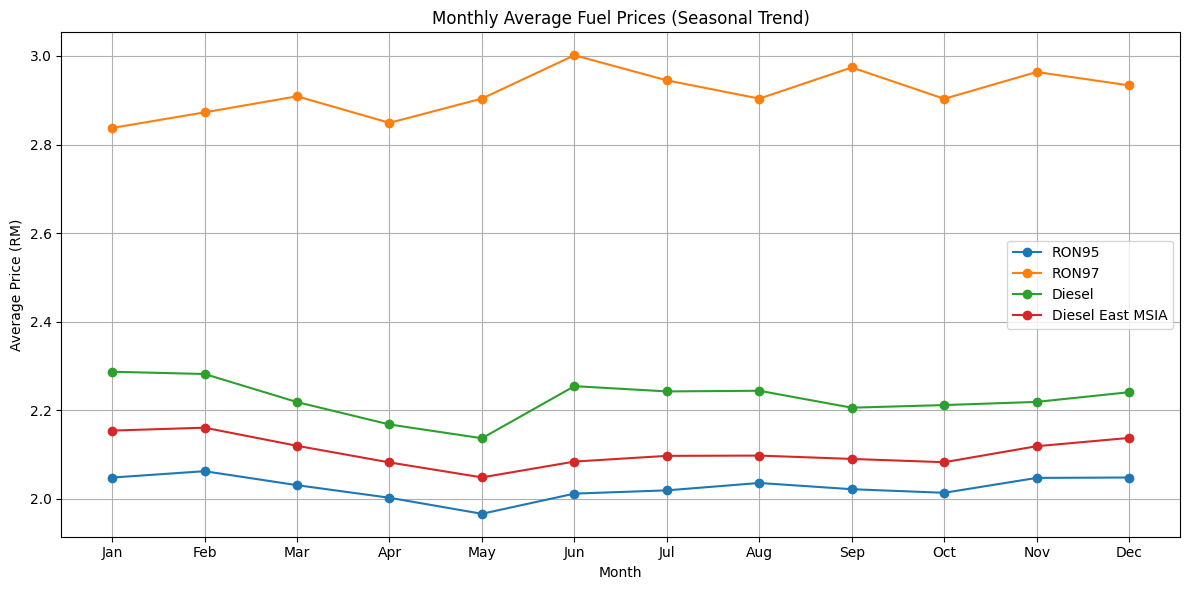

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(monthly_avg['month'], monthly_avg['ron95'], label='RON95', marker='o')
plt.plot(monthly_avg['month'], monthly_avg['ron97'], label='RON97', marker='o')
plt.plot(monthly_avg['month'], monthly_avg['diesel'], label='Diesel', marker='o')
plt.plot(monthly_avg['month'], monthly_avg['diesel_eastmsia'], label='Diesel East MSIA', marker='o')

plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.title('Monthly Average Fuel Prices (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('Average Price (RM)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


This chart shows the **monthly average fuel prices** across all months of the year, revealing **seasonal patterns** for RON95, RON97, Diesel, and Diesel (East Malaysia).

### **Key Observations:**

#### **RON95 (Blue Line):**

* Remains very **stable across all months**, fluctuating only slightly between **RM 1.96 and RM 2.06**.
* Indicates **strong price regulation** with minimal seasonal influence.

#### **RON97 (Orange Line):**

* **Clear seasonal pattern**:

  * Peaks around **June** and **September–November** (reaching close to **RM 3.00**).
  * Lowest in **January** and **April** (around **RM 2.85–2.87**).
* This pattern suggests **market-responsive pricing**, possibly reflecting:

  * Higher global crude demand in mid-year (summer driving season),
  * Post-summer refinery maintenance constraints,
  * Year-end stock adjustments.

#### **Diesel (Green Line):**

* Shows a slight **dip from March to May**, then rebounds in **June**, stabilizing afterward.
* Seasonal movements are **milder than RON97** but still present—especially post-2023 after the subsidy shift.

#### **Diesel East Malaysia (Red Line):**

* Nearly **flat with mild seasonal dips**, particularly in **April–May**.
* Reflects **continued price control** in East Malaysia.
* Minor increases in **November–December**, but variations are minimal.


<h2>Conclusion</h2>

The analysis of Malaysian fuel prices from 2017 to 2025 reveals clear distinctions between **regulated** and **market-based** fuels. **RON95** and **East Malaysia Diesel**, which are price-controlled, exhibit **stable price levels**, minimal volatility, and **no meaningful seasonal trends**, indicating strong government intervention. In contrast, **RON97**, which is exposed to market dynamics, displays **high volatility**, clear **seasonal patterns**, and sharp price spikes aligned with global events, such as the **COVID-19 pandemic** and the **Russia–Ukraine war**.

The **price gap between RON97 and RON95** widened significantly post-2022, peaking in response to global oil market disruptions, and has only partially normalized. **Diesel (West Malaysia)**, following recent subsidy adjustments, shows a **transition from price stability to moderate volatility and seasonality**, reflecting its move toward market-based pricing.

Overall, **market-linked fuels respond to both international events and seasonal demand**, while **regulated fuels remain insulated** but are affected by policy shifts and subsidy decisions.
